# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

INFO:root:Elements: ['Sr', 'Ti', 'O'], the order is used for the atom types. Please initiate the correct elements in your system.


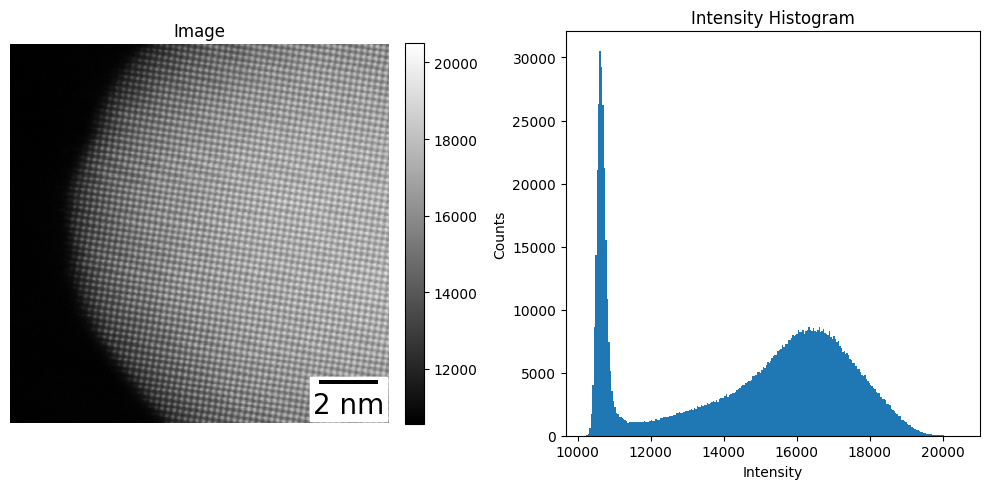

In [1]:
import matplotlib.pyplot as plt

import qem

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('../data/Au/Example_Au.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx
from qem.image_fitting import ImageModelFitting

model=ImageModelFitting(image, dx=dx)
model.import_coordinates(input_coordinates)
model.plot()

In [2]:
from qem.image_fitting import ImageModelFitting

model=ImageModelFitting(image, dx=dx)
model.import_coordinates(input_coordinates)
model.fit_background = True
model.model = 'gaussian'
params = model.init_params()
params = model.linear_estimator(params)
model.prediction = model.predict_local(params)
# model.fit_global(params, maxiter=10000, tol =1e-3)
model.fit_random_batch(params, maxiter=100, tol =1e-3,batch_size=6000)


INFO:root:Elements: ['Sr', 'Ti', 'O'], the order is used for the atom types. Please initiate the correct elements in your system.
Fitting random batch:   0%|          | 0/1 [00:00<?, ?it/s]INFO:2025-02-15 00:48:18,946:jax._src.xla_bridge:945: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-02-15 00:48:18,947:jax._src.xla_bridge:945: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
Fitting random batch: 100%|██████████| 1/1 [00:06<00:00,  6.62s/it]
INFO:root:Convergence rate for pos_x = 1.052001953125
INFO:root:Convergence not reached
Fitti

{'pos_x': array([ 159.28604126,  160.97158813,  161.19247437, ..., 1021.78723145,
        1019.85443115,  219.70193481]),
 'pos_y': array([ 437.14422607,  405.5038147 ,  524.14794922, ..., 1008.79052734,
        1020.50836182,  259.83996582]),
 'height': array([ 732.07918636,  956.06537593,  713.64199539, ..., 6076.19742309,
        3473.37454446,  870.26114488]),
 'sigma': array([5.65253782]),
 'background': 10825.393276106452}

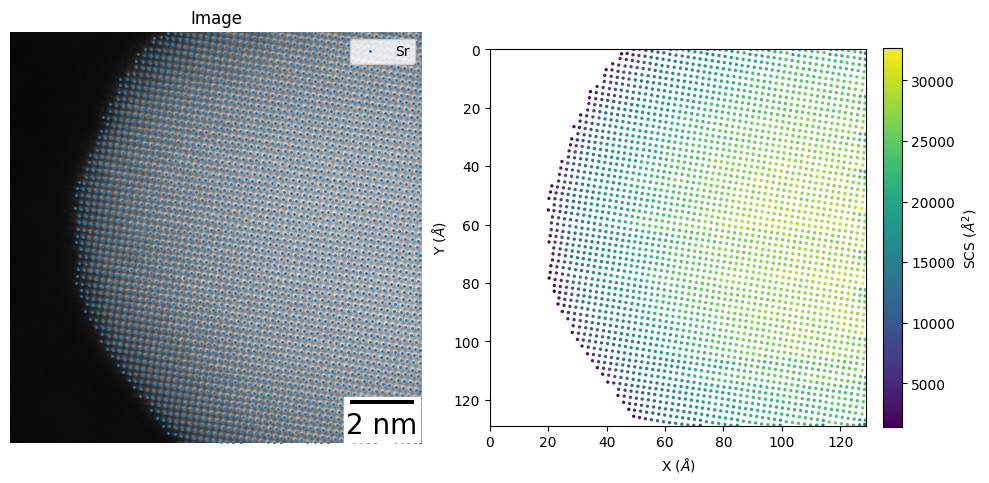

In [3]:
model.plot_scs()

Text(0.5, 1.0, 'Residuals')

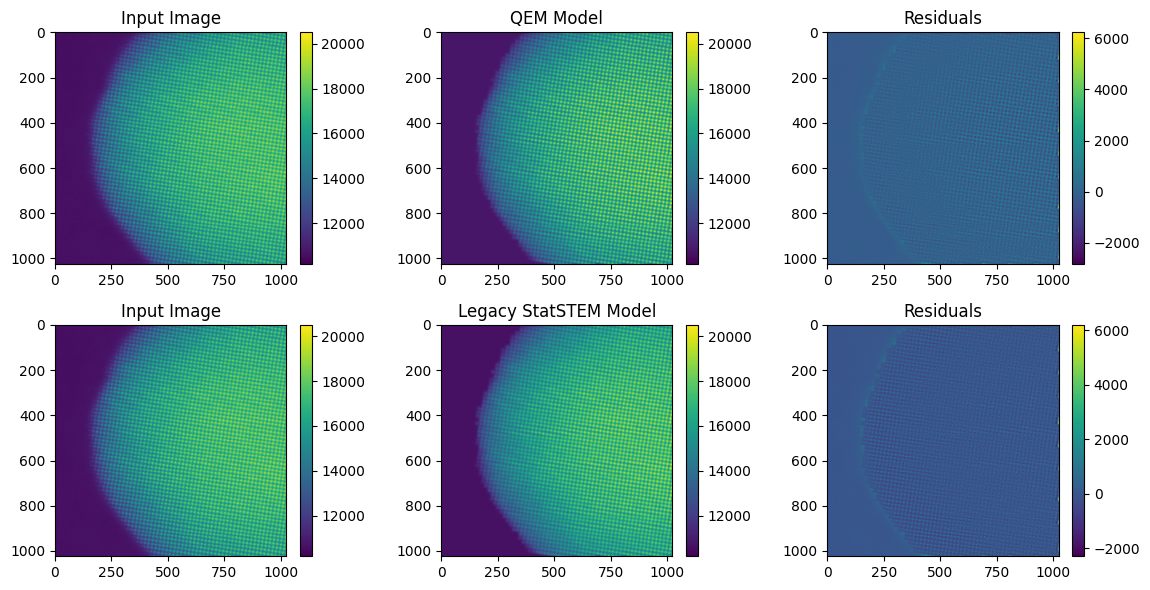

In [4]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.model
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())   
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')